In [4]:
# ! pip install matplotlib
# python -m notebook

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def f(x):
    return 4*x**2 - 10*x + 6

In [4]:
f(3.0)

12.0

In [5]:
xs = np.arange(-5,5,0.25)
ys = f(xs)
xs,ys

(array([-5.  , -4.75, -4.5 , -4.25, -4.  , -3.75, -3.5 , -3.25, -3.  ,
        -2.75, -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75,
        -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,
         1.75,  2.  ,  2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,
         4.  ,  4.25,  4.5 ,  4.75]),
 array([156.  , 143.75, 132.  , 120.75, 110.  ,  99.75,  90.  ,  80.75,
         72.  ,  63.75,  56.  ,  48.75,  42.  ,  35.75,  30.  ,  24.75,
         20.  ,  15.75,  12.  ,   8.75,   6.  ,   3.75,   2.  ,   0.75,
          0.  ,  -0.25,   0.  ,   0.75,   2.  ,   3.75,   6.  ,   8.75,
         12.  ,  15.75,  20.  ,  24.75,  30.  ,  35.75,  42.  ,  48.75]))

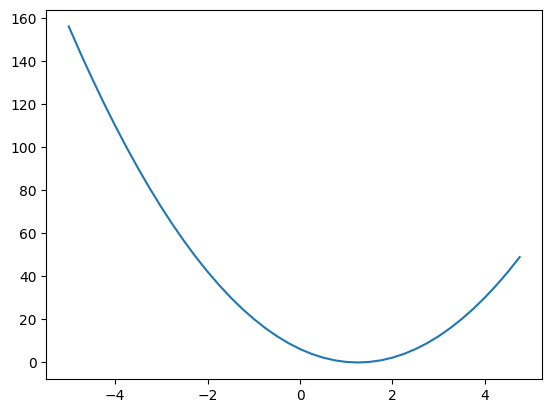

In [6]:
plt.plot(xs,ys)

In [7]:
#defining the derivative
h = 0.0001
x = 3
y = (f(x+h) - f(x))/h
y

14.000400000035995

In [8]:
#what if the number is -3 then the slope is negative if we go in positive direction in the graph
#let us go more complex
a = 2.0
b = -3.0
c = 10.0
d = a*b + c
d


4.0

In [9]:
#now we are going to derivative of d with respective to the above function
h = 0.0001
d1 = a*b +c
a += h
d2 = a*b +c
print(f"slope if we increase a is {(d2-d1)/h} as per the calculation of a and d1 is {d1} and d2 is {d2}")

slope if we increase a is -3.000000000010772 as per the calculation of a and d1 is 4.0 and d2 is 3.999699999999999


In [10]:
#now we are going to building the neural networks
class Value:
    def __init__(self,data, _children =(), _op='',label=''):
        self.data = data
        self.grad = 0.0
        self.backward = lambda: None
        self._prev = set(_children)
        self._op = _op
        self.label = label
    def __repr__(self):
        return f"Value data = {self.data}"

    def __add__(self,other):
        out = Value(self.data+other.data, (self,other), '+')
        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad
        out._backward = _backward
        return out
    
    def __mul__(self,other):
        out = Value(self.data * other.data, (self,other), '*')
        def _backward():
            self.grad += (other.data * out.grad)
            other.grad += self.data + out.grad
            
        out._backward = _backward
        
        return out

    def tanh(self):
        x = self.data
        tan = (math.exp(2*x)-1)/(math.exp(2*x)+1)
        out = Value(tan, (self,),'tanh')

        def _backward():
            self.grad +=( 1- tan**2) * out.grad
        out._backward = _backward
        
        return out

a = Value(2.0,label='a') 
b = Value(3.0,label='b')
c = Value(4.0,label='c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0,label='f')
L = d * f; L.label = 'L'
L

Value data = -20.0

In [11]:
L._prev

{Value data = -2.0, Value data = 10.0}

In [12]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{%s | data %.4f | grad %.4f}" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

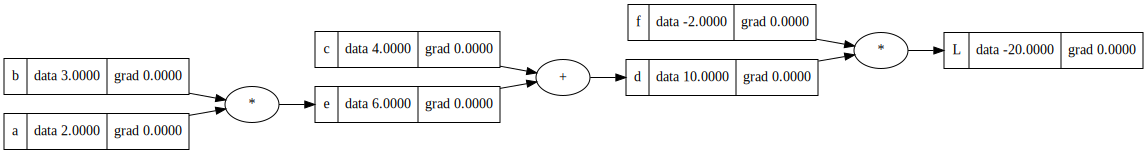

In [14]:
draw_dot(L) 

In [15]:
# L = d*f
# dL/dd = ? f

# f(x+h) - f(x)/h

# (d+h)*f - df/h - df+hf - df/h - hf/h = f


In [16]:
#now we run the backpropagation from L and compute the derivative wrt L

# dl/dl = 1 and  df/dl and dd/dl
L.grad = 1.0
d.grad = -2.0
f.grad = 10.0
#dl/de = dl/dd * dd/de = -2* 1 = -2 i.e., change of loss dl w.r.t de (another way of interpreting is how much does l change if we tweak e)
e.grad = -2.0
c.grad = -2.0
a.grad = -6.0
b.grad = -4.0



In [17]:
def lol():
    h = 0.001
    a = Value(2.0,label='a') 
    b = Value(3.0,label='b')
    c = Value(4.0,label='c')
    e = a*b; e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2.0,label='f')
    L = d * f; L.label = 'L'
    L1 = L.data

    a = Value(2.0,label='a') 
    b = Value(3.0,label='b')
    a.data += h
    c = Value(4.0,label='c')
    e = a*b; e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2.0 ,label='f')
    L = d * f; L.label = 'L'
    L2 = L.data

    print((L2-L1)/h)
    

In [18]:
lol()

-6.000000000000227


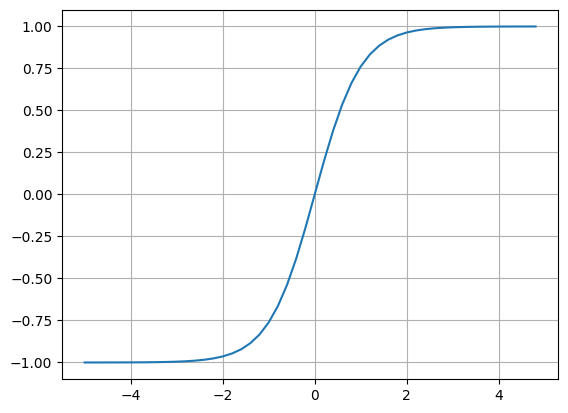

In [19]:
#activation functions are tanh,sigmoid 
# in neuron first half (wx + b) second half is f(wx+b) activation i.e., activation function in the neuron
plt.plot(np.arange(-5,5,0.2),np.tanh(np.arange(-5,5,0.2)));
plt.grid();

In [20]:
#inputs x1 and x2
x1 = Value(2.0,label='x1')
x2 = Value(-3.0,label='x2')
#weights w1 and w2
w1 = Value(-1.0,label='w1')
w2 = Value(-1.0,label='w2')
#first half in the cell
w1x1 = x1*w1; w1x1.label = 'w1x1'
w2x2 = x2*w2; w2x2.label = 'w2x2'
#bias
b = Value(0.3223423,label='b')

w1x1w2x2 = w1x1 + w2x2; w1x1w2x2.label = 'w1x1 + w2x2'
n = w1x1w2x2 + b ; n.label = 'n'

o = n.tanh() #tanh is a hyperbolic functions i.e., e^x - e^-x
o.grad = 1.0


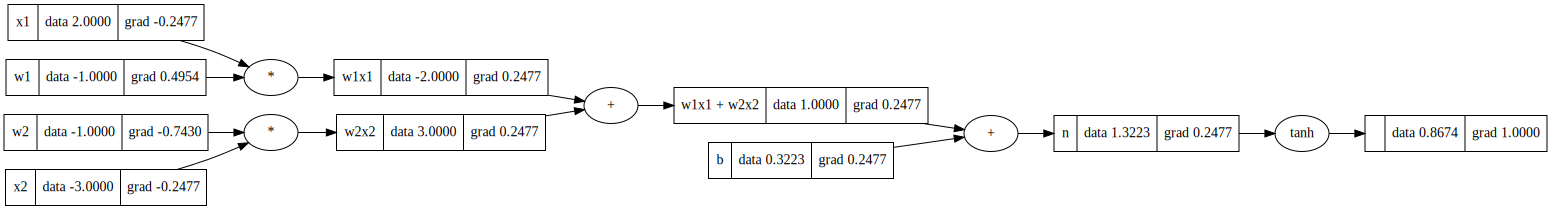

In [21]:
# o = tanh
# derivative of tanh is 1-tan^2h
# do/dn = 1-o**2
o.data
# so do/dh is 1-o.data^2
n.grad = 1- o.data**2
b.grad = n.grad * 1
w1x1w2x2.grad = n.grad * 1

w1x1.grad = w1x1w2x2.grad * 1
w2x2.grad = w1x1w2x2.grad * 1

w1.grad = w1x1.grad * x1.data
x1.grad = w1x1.grad * w1.data

w2.grad = w2x2.grad * x2.data
x2.grad = w2x2.grad * w2.data

draw_dot(o)


In [22]:
o.grad = 1.0

In [25]:
o._backward() #backward step i.e., backpropogation

In [26]:
n._backward()

In [27]:
w1x1w2x2._backward()

In [28]:
w1x1._backward()
w2x2._backward()

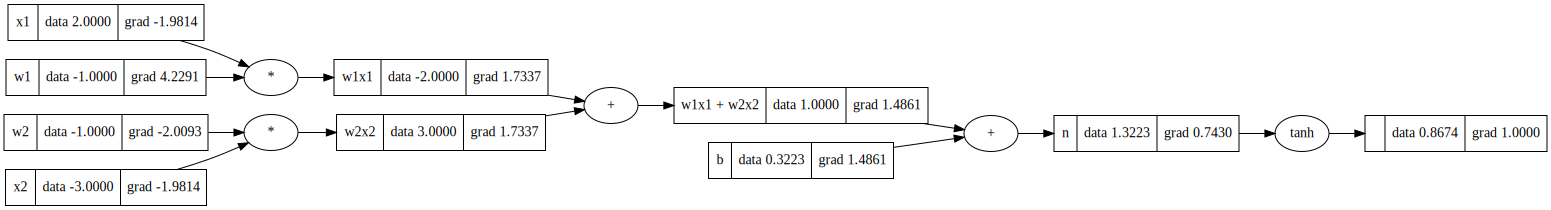

In [29]:
draw_dot(o)

In [30]:
#this can be done using pytorch in the following way
import torch

In [31]:
x1 = torch.Tensor([2.0]).double()           ;x1.requires_grad = True
x2 = torch.Tensor([-3.0]).double()          ;x2.requires_grad = True
w1 = torch.Tensor([-1.0]).double()           ;w1.requires_grad = True
w2 = torch.Tensor([-1.0]).double()           ;w2.requires_grad = True
b = torch.Tensor([0.3223]).double()           ;b.requires_grad = True
n = w1*x1 + w2*x2 + b
o = torch.tanh(n) #activation function is tanh

print(o.data.item()) #tanh
o.backward()

print(x1.grad.item())
print(x2.grad.item())
print(w1.grad.item())
print(w2.grad.item())

0.8673547635458637
-0.2476957141542988
-0.2476957141542988
0.4953914283085976
-0.7430871424628964


In [32]:
torch.Tensor([2.0]).double().dtype #because python has float 64 precesion so we conver the same

torch.float64

In [33]:
o

tensor([0.8674], dtype=torch.float64, grad_fn=<TanhBackward0>)

In [34]:
o.item()

0.8673547635458637

In [35]:
o.data.item()

0.8673547635458637

In [ ]:
#building a neural net 2 layer multilayer perceptron layer (MLP)
#tanh/relu is a non linearity activation which we will pass the w*x+b
# loss is a single number measure how well the nn is performing
# various loss functions mean squared error loss etc...
# loss is sum of all examples losses
# in gradient descent we increase/decrease the weights of all the parameters like weights in the direction
# of decreasing the loss